In [1]:
import geopandas as gpd
import os
import matplotlib as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

/var/folders/zs/20zk30ss1dq_90y7_2t9wgvc0000gn/T/ipykernel_25883/3988281550.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [5]:
dir_main = os.getcwd()
root = os.path.dirname(os.path.dirname(os.path.dirname(dir_main)))
root

'/Users/davidvandijcke/Dropbox (University of Michigan)/Ukraine_AirRaids'

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# load data
alerts = pd.read_csv(os.path.join(root, r"repo/data/raw/countries_with_alert_systems/countries_with_alert_systems.csv"))

df = world.merge(alerts, right_on='country', left_on='name' ,how='left')


In [7]:
df.cell_broadcast = df.cell_broadcast.fillna(0)
df.sirens = df.sirens.fillna(0)

df['any_system'] = (df[['sirens','cell_broadcast']].max(axis=1)>0).map({False:"No System", True: "National Alert System"})

gdf = gpd.GeoDataFrame(df)

In [8]:
df['any_system']

0                  No System
1                  No System
2                  No System
3      National Alert System
4      National Alert System
               ...          
172                No System
173                No System
174                No System
175                No System
176                No System
Name: any_system, Length: 177, dtype: object

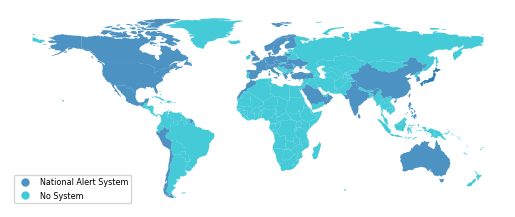

In [9]:
ax = gdf.plot(column='any_system', categorical=True, alpha=0.8 ,legend=True,legend_kwds={'loc': 'lower left', 'fontsize':'xx-small','markerscale':0.6})
ax.set_axis_off()
plt.pyplot.savefig(os.path.join(root, r"repo/output/figs/alert_systems.pdf") ,dpi=1000)


In [7]:
gdf.loc[gdf.name=='Philippines']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,cell_broadcast,sirens,any_system
147,108116615.0,Asia,Philippines,PHL,376795,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",Philippines,1.0,0.0,National Alert System
